# Resumo

Para este projeto, será analisado dados reais de uma empresa americana de empréstimos chamada Lending Club.
Lending club conecta pessoas que precisam de dinheiro(mutuários) com pessoas que têm dinheiro(investidores), porém, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta.
Será criado um modelo que ajude a prever isso.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

***
## Visão geral do dataset

In [44]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


***
## Informações adicionais

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Verificando dados faltantes

In [46]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

***
## Traduzindo colunas

In [47]:
df.columns = ['atende criterios', 'objetivo do emprestimo', 'juros do emprestimo', 'parcelas mensais', 'renda anual',
       'rendimento tomador de emprestimo', 'pontuacao de credito', 'dias com credito', 'quantidade nao paga', 'valor da linha de credito usada',
       'qtd consultas em seis meses', 'qtd atraso de pagamento', 'qtd registros negativos', 'pagou de volta']

In [48]:
df.head()

,atende criterios,objetivo do emprestimo,juros do emprestimo,parcelas mensais,renda anual,rendimento tomador de emprestimo,pontuacao de credito,dias com credito,quantidade nao paga,valor da linha de credito usada,qtd consultas em seis meses,qtd atraso de pagamento,qtd registros negativos,pagou de volta
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


***
## Visualizando pontuação no lending club dos clientes baseado se atendem aos critérios das politicas da empresa

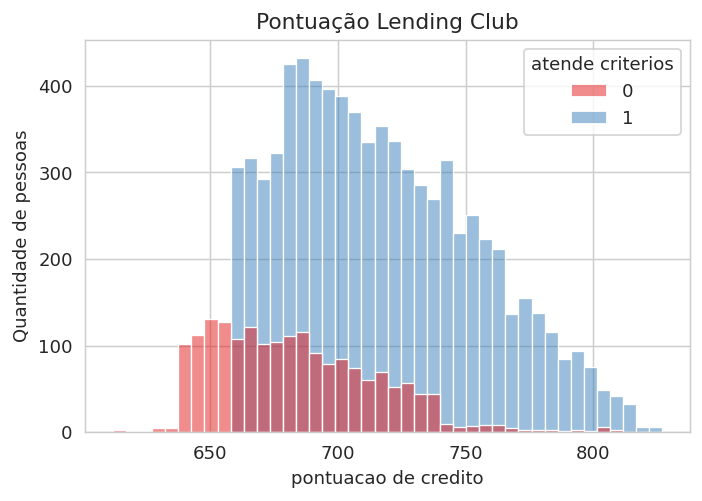

In [49]:
sns.set_style("whitegrid")
plt.figure(dpi=130)
plt.title("Pontuação Lending Club")
plt.ylabel("Quantidade de pessoas")
sns.histplot(data=df, x="pontuacao de credito", hue="atende criterios", palette="Set1")
plt.show()

Obs: Podemos notar que a maioria das pessoas atendem aos critérios da empresa para a negociação do emprestimo.

***
## Visualizando quem pagou o débito baseado na sua pontuação do lending club

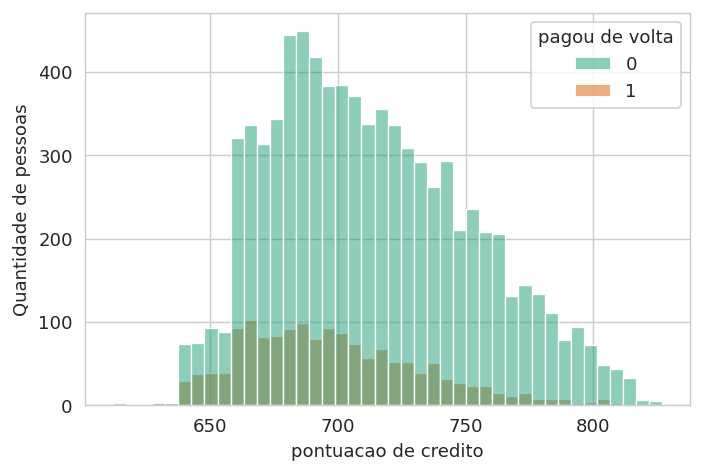

In [50]:
plt.figure(dpi=130)
plt.ylabel("Quantidade de pessoas")
sns.histplot(data=df, x="pontuacao de credito", hue="pagou de volta", palette="Dark2")
plt.show()

Obs: É notável que a maioria das pessoas tem uma pontuação por volta dos 700, e uma pequena parte quitou suas dívidas, e a principio, a pontuação nao é determinante para informar quem pagará seu débito
***

## Visualizando distribuição do objetivo do empréstimo por quitação do mesmo

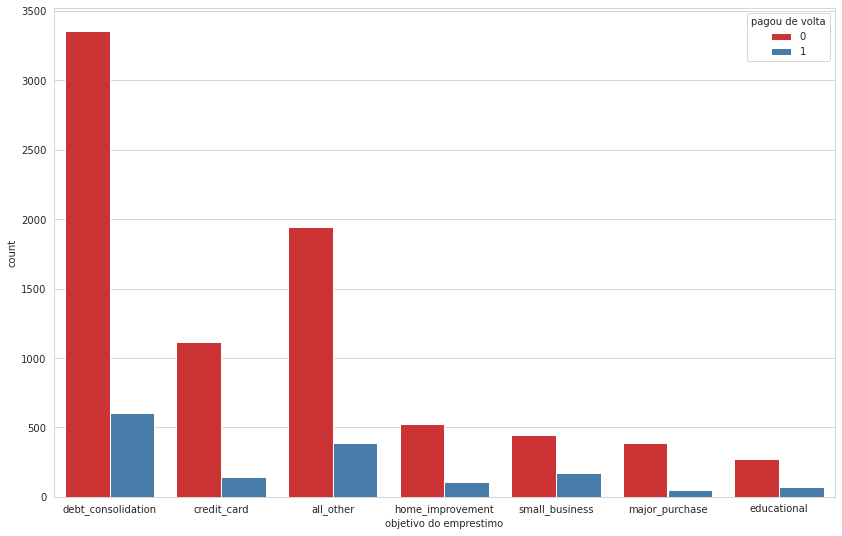

In [51]:
plt.figure(figsize=(14,9))
plt.ylabel("Quantidade de pessoas")
sns.countplot(data=df, x="objetivo do emprestimo", hue="pagou de volta", palette="Set1")
plt.show()  

Obs: A maioria das dívidas são por consolidação de débito
***

## Visualizando pontuação de crédito baseado na taxa de juros

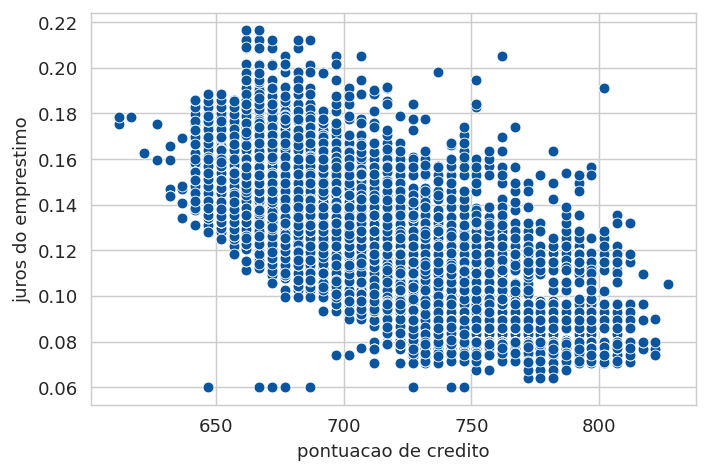

In [52]:
plt.figure(dpi=130)
sns.set_palette("Blues_r")
sns.scatterplot(data=df, x="pontuacao de credito", y="juros do emprestimo")
plt.show()

Obs: É notável que a taxa de juros aumenta quando a pontuação do cliente tende a cair

## Taxa de juros do empréstimo baseado na renda anual do cliente

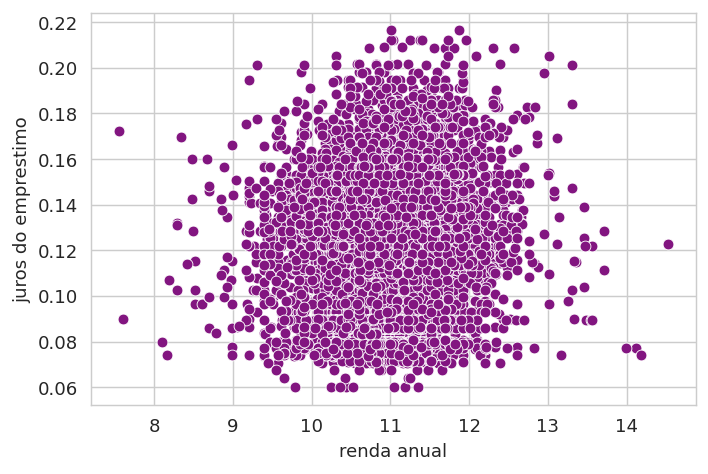

In [53]:
plt.figure(dpi=130)
sns.set_palette("BuPu_r")
sns.scatterplot(data=df, x="renda anual", y="juros do emprestimo")
plt.show()

Obs:  É notável que a grande maioria dos clientes tem uma renda próxima a 11 mil por ano, e essa grande maioria paga uma taxa entre 10 a 16%
***

# Agrupamentos
### agrupando média de quantidade de consultorias que o cliente teve durante o semestre por quitação de dívidas

In [54]:
df[["pagou de volta","qtd consultas em seis meses"]].groupby("pagou de volta").mean()

,qtd consultas em seis meses
pagou de volta,
0,1.433934
1,2.330724


OBs: Em média, quem tem mais consultas durante o semestre tende a pagar suas dívidas


***
### Agrupando média de pontuação no lending club por quitação de dívidas

In [55]:
df[["pontuacao de credito","pagou de volta"]].groupby("pagou de volta").mean()

,pontuacao de credito
pagou de volta,
0,713.326911
1,697.828441


Obs: assim como no gráfico, foi confirmado que a pontuação nao é fator determinante para a quitação da dívida

___
# Preparando dados para aplicar modelo
Por se tratar de um problema de classificação, será utilizado os modelos, Random forest, Logistic Regression, SVC, Adaboost, Gradient Boosting e Extra Tree para comparações de resultados


In [56]:
dadosPreparados = pd.get_dummies(df,columns=["objetivo do emprestimo"], drop_first=True)

In [66]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

In [58]:
X = dadosPreparados.drop("pagou de volta", axis=1)
y = dadosPreparados["pagou de volta"]

## Instanciando modelos

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=101)

In [68]:
rforest = RandomForestClassifier()
extree = ExtraTreesClassifier()
gradboost = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

## Treino

In [69]:
rforest.fit(Xtrain, ytrain)
extree.fit(Xtrain, ytrain)
gradboost.fit(Xtrain, ytrain)
adaboost.fit(Xtrain, ytrain)
logreg.fit(Xtrain, ytrain)
svc.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

## Guardando predições e score do modelo

In [70]:
rfpredi = rforest.predict(Xtest)
gradpredi = gradboost.predict(Xtest)
adapredi = adaboost.predict(Xtest)
extreepredi = extree.predict(Xtest)
logpredi = logreg.predict(Xtest)
svcpredi = svc.predict(Xtest)
knnpredi = knn.predict(Xtest)

# Qual modelo teve melhor score?

In [71]:
preds = np.array([gradpredi, adapredi, extreepredi, rfpredi, logpredi, svcpredi, knnpredi])
modelos = ["Gradient Boosting","AdaBoost","Extre Tree","Random Forest","Logistic Regression","SVC","KNN"]
acuracia = []
precisao = []
f1 = []
revocacao = []
for i in preds:
    acuracia.append(accuracy_score(ytest, i)*100)
    precisao.append(precision_score(ytest, i)*100)
    f1.append(f1_score(ytest, i)*100)
    revocacao.append(recall_score(ytest, i)*100)

metricasGerais = pd.DataFrame({
    "Modelo":modelos,
    "Acuracia":acuracia,
    "Precisao":precisao,
    "F1":f1,
    "Revocacao":revocacao
}).sort_values(by="Precisao",ascending=False)
metricasGerais

,Modelo,Acuracia,Precisao,F1,Revocacao
5,SVC,84.620738,100.000000,0.450450,0.225734
4,Logistic Regression,84.690327,60.000000,3.930131,2.031603
3,Random Forest,84.516354,45.000000,3.887689,2.031603
0,Gradient Boosting,84.411969,39.130435,3.862661,2.031603
2,Extre Tree,84.133612,38.181818,8.433735,4.740406
1,AdaBoost,83.994433,35.593220,8.366534,4.740406
6,KNN,82.150313,21.311475,9.203540,5.869074


# Visualizando margem de erro dos modelos


Text(0.5, 0, 'Margem de erro')

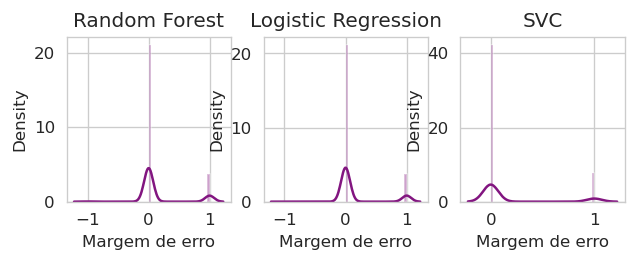

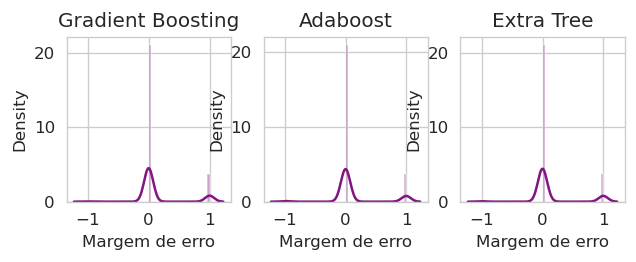

In [64]:
plt.figure(dpi=120)
plt.subplot(2,3,1)
plt.title("Random Forest")
sns.distplot(ytest - rfpredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,2)
plt.title("Logistic Regression")
sns.distplot(ytest - logpredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,3)
plt.title("SVC")
sns.distplot(ytest - svcpredi)
plt.xlabel("Margem de erro")
#
plt.figure(dpi=120)
plt.subplot(2,3,4)
plt.title("Gradient Boosting")
sns.distplot(ytest - gradpredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,5)
plt.title("Adaboost")
sns.distplot(ytest - adapredi)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,6)
plt.title("Extra Tree")
sns.distplot(ytest - extreepredi)
plt.xlabel("Margem de erro")


***

# Avaliando métricas gerais dos modelos

In [65]:
metricasGerais

,Modelo,Acuracia,Precisao,F1,Revocacao
5,SVC,84.620738,100.000000,0.450450,0.225734
4,Logistic Regression,84.690327,60.000000,3.930131,2.031603
0,Gradient Boosting,84.411969,39.130435,3.862661,2.031603
3,Random Forest,84.411969,38.095238,3.448276,1.805869
2,Extre Tree,84.168406,36.956522,6.952965,3.837472
1,AdaBoost,83.994433,35.593220,8.366534,4.740406


# Conclusão
Apesar de todos os modelos apresentarem uma acurácia semelhante, a precisão neste caso é um fator a se priorizar, por ser mais prejudicial aos investidores um numero alto de falsos positivos(quem nao atende aos criterios, e passa) do que de falsos negativos(quem atende os criterios, e nao passa), e o SVC teve um ótimo score de precisão